## Practicing the OSEMN model
The titanic dataset will be used. Kaggle titanic provides 2 csv files: train.csv and test.csv. The train.csv will be used to provide the prediction for the test.csv.

In [194]:
# Importing the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Obtain Data

The first steps will be reading the train.csv. These 2 files is downloaded and saved in ../data/ folder.

In [195]:
train= pd.read_csv("../data/train.csv")
test= pd.read_csv("../data/test.csv")

In [196]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [197]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# 2. Scrub Data
This includes filtering lines, extracting columns/words, Replacing values, Handling missing values and converting formats. 

From the data shown above, the Sex and Embarked column shall be converted to numeric format. Before any formating, we shall handles those missing data.

In [198]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [199]:
train["Age"].median(skipna=True)

28.0

To get a more accurate prediction of the missing data, the train dataset and test dataset is combined.

In [200]:
train_data = train.drop('Survived', axis=1)
full_data = pd.concat([train_data, test])
full_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


## Analizing Missing Age
### Total records is 1309. Age has missing data. Mean of Age=29.85.

 Check on columns with missing data.

In [201]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [202]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [203]:
full_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Age has 177 missing records while Cabin has 687 missing records and Embarked has only 2 missing records. 

#### Either the mean or the median is used to replace all the missing age. Mean will be used to replace the missing age.

## Analysing missing 'Embarked'

Lets explore the missing data for the Embarked fields. 

In [204]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Most probably fare could tell the embarkation points. Looking into the fare might gives some hints on the Embark point.

In [205]:
full_data.groupby('Embarked')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,270.0,62.336267,84.185996,4.0125,13.8583,28.51875,78.966675,512.3292
Q,123.0,12.409012,13.616133,6.7500,7.7500,7.75000,10.197900,90.0000
S,913.0,27.418824,37.096402,0.0000,8.0500,13.00000,27.750000,263.0000


In [206]:
full_data.groupby(['Embarked','Pclass'])['Fare'].describe()

count        mean        std      min       25%      50%  \
Embarked Pclass                                                             
C        1       141.0  106.845330  96.837527  25.7417  49.50420  76.7292   
         2        28.0   23.300593  11.082198  12.0000  13.86145  15.3146   
         3       101.0   11.021624   4.862605   4.0125   7.22920   7.8958   
Q        1         3.0   90.000000   0.000000  90.0000  90.00000  90.0000   
         2         7.0   11.735114   1.090680   9.6875  11.52915  12.3500   
         3       113.0   10.390820   6.040804   6.7500   7.75000   7.7500   
S        1       177.0   72.148094  61.995107   0.0000  26.55000  52.0000   
         2       242.0   21.206921  13.969256   0.0000  13.00000  15.3750   
         3       494.0   14.435422  13.118281   0.0000   7.85420   8.0500   

                       75%       max  
Embarked Pclass                       
C        1       134.50000  512.3292  
         2        31.80415   41.5792  
         3        14.45830   22.3583  
Q        1        90.00000   90.0000  
         2        12.35000   12.3500  
         3         7.87920   29.1250  
S        1        83.47500  263.0000  
         2        26.00000   73.5000  
         3        15.90000   69.5500

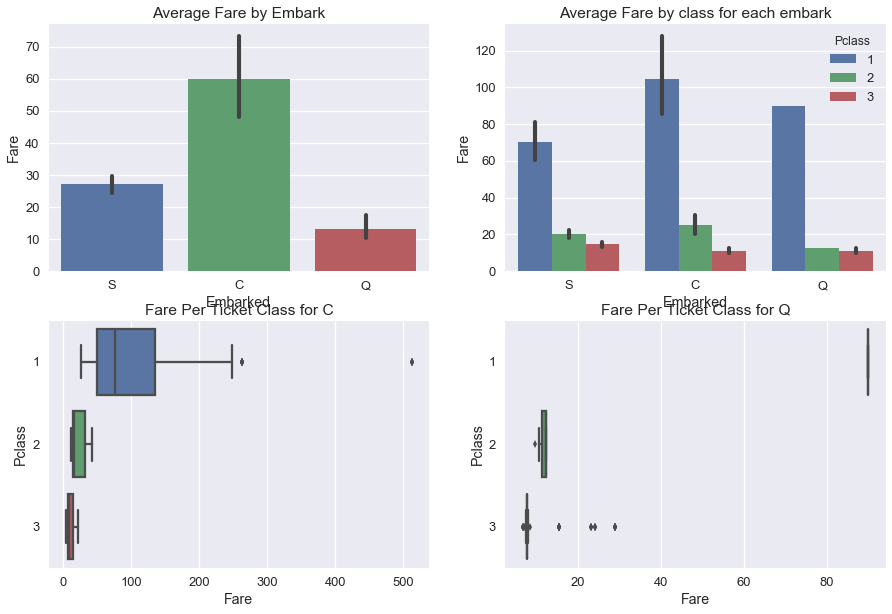

In [207]:
grouped = full_data.groupby('Embarked')
f, ((g1, g2), (g3, g4)) = plt.subplots(2, 2, figsize=(15,10))
sns.barplot(x="Embarked", y="Fare", data=train, ax=g1).set_title("Average Fare by Embark");
sns.barplot(x="Embarked", y="Fare", hue="Pclass", data=train, ax=g2).set_title("Average Fare by class for each embark");
sns.boxplot(x='Fare', y='Pclass',data=grouped.get_group('C'), orient='h', ax=g3).set_title("Fare Per Ticket Class for C");
sns.boxplot(x='Fare', y='Pclass',data=grouped.get_group('Q'), orient='h', ax=g4).set_title("Fare Per Ticket Class for Q");

From the analysis above, for tickets of pClass=1 with fare=80 most probably falls in C Embarkation.

### We will assume the 2 missing values for Embarked is "C".

### Analysing missing Fare

In [208]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


This passenger bought a Pclass ticket that embarked at S. The mean of the pclass=3 for S point.

In [209]:
full_data.groupby(['Embarked','Pclass'])['Fare'].mean()

Embarked  Pclass
C         1         106.845330
          2          23.300593
          3          11.021624
Q         1          90.000000
          2          11.735114
          3          10.390820
S         1          72.148094
          2          21.206921
          3          14.435422
Name: Fare, dtype: float64

In [210]:
embarked_s_3=full_data.query("Embarked == 'S' and Pclass == 3")['Fare'].describe()
embarked_s_3['mean']

14.435422064777338

#### As there are too many missing Cabin. It is hard to predict the missing Cabin. It will be treated as an unknown data.

missing data will be filled as following:
- Age = mean
- Cabin = '-'
- Embarked = 'C'
- Fare = mean of fare for pclass=3 with embarked="S"

In [211]:
# Replace missing Age with calculated mean
train['Age'].fillna(round(full_data.mean()["Age"],1), inplace=True)
test['Age'].fillna(round(full_data.mean()["Age"],1), inplace=True)

# Replace missing Cabin as unknown
train['Cabin'].fillna('-', inplace=True)
test['Cabin'].fillna('-', inplace=True)

# Replace the missing Embarked as C
train['Embarked'].fillna('C', inplace=True)

# Replace null Fare with calculated mean
test['Fare'].fillna(embarked_s_3['mean'], inplace=True)


train.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [212]:
test.isnull().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [213]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,-,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,-,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,-,S


In [214]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,-,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,-,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,-,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,-,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,-,S


### Formating Data

The Sex and Embarked column shall be converted to numeric format.

In [215]:
gender_changes = {'male':0, 'female':1}
train['Sex'].replace(gender_changes, inplace=True)
test['Sex'].replace(gender_changes, inplace=True)

In [216]:
embarked_changes = {'Q':3, 'S':1, 'C':2}
train['Embarked'].replace(embarked_changes, inplace=True)
test['Embarked'].replace(embarked_changes, inplace=True)

In [217]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,-,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,-,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,-,1


In [218]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,-,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,-,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,-,3
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,-,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,-,1


# 3. Explore Data

Exploratory data analysis. To understand the data, deriving statistics and creating visualizations.

### Understanding the Age.

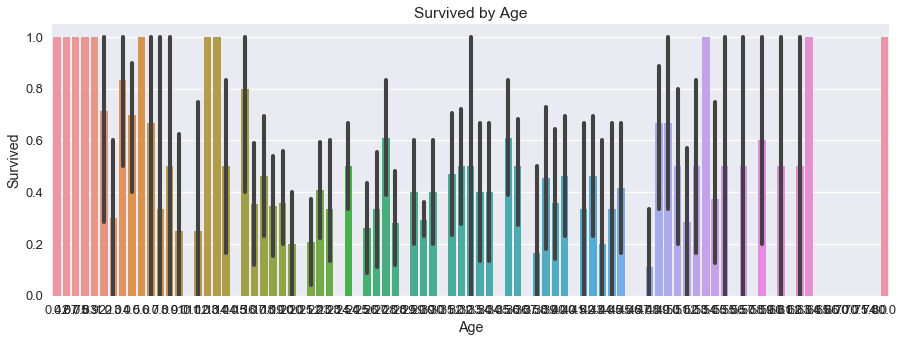

In [219]:
survived_group=train.groupby(["Age"])

sns.barplot(x="Age", y="Survived",data=train ).set_title("Survived by Age");

In [220]:
train[train['Age']>=65].describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000
mean,403.363636,0.090909,1.727273,0.0,69.772727,0.090909,0.181818,28.905691,1.636364
std,300.484699,0.301511,0.904534,0.0,4.568171,0.301511,0.404520,23.128014,0.809040
min,34.000000,0.000000,1.000000,0.0,65.000000,0.000000,0.000000,7.750000,1.000000
25%,107.000000,0.000000,1.000000,0.0,65.500000,0.000000,0.000000,9.137500,1.000000
50%,457.000000,0.000000,1.000000,0.0,70.000000,0.000000,0.000000,26.550000,1.000000
75%,652.000000,0.000000,2.500000,0.0,71.000000,0.000000,0.000000,42.079200,2.000000
max,852.000000,1.000000,3.000000,0.0,80.000000,1.000000,1.000000,71.000000,3.000000


In [221]:
train[train['Age']>55].describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,40.00000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000
mean,438.20000,0.300000,1.525000,0.225000,62.350000,0.15000,0.300000,45.680728,1.450000
std,251.55661,0.464095,0.784056,0.422902,5.619563,0.36162,0.757865,50.938517,0.638508
min,12.00000,0.000000,1.000000,0.000000,55.500000,0.00000,0.000000,6.237500,1.000000
25%,223.75000,0.000000,1.000000,0.000000,58.000000,0.00000,0.000000,10.500000,1.000000
50%,476.00000,0.000000,1.000000,0.000000,61.000000,0.00000,0.000000,28.125000,1.000000
75%,635.25000,1.000000,2.000000,0.000000,65.000000,0.00000,0.000000,64.234400,2.000000
max,880.00000,1.000000,3.000000,1.000000,80.000000,1.00000,4.000000,263.000000,3.000000


In [222]:
train[train['Age']<16].describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,431.602410,0.590361,2.626506,0.518072,6.369518,1.734940,1.265060,32.785795,1.337349
std,287.079319,0.494757,0.619024,0.502711,4.729063,1.638592,0.682255,33.466438,0.590104
min,8.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,7.225000,1.000000
25%,172.500000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000,15.900000,1.000000
50%,436.000000,1.000000,3.000000,1.000000,5.000000,1.000000,1.000000,26.250000,1.000000
75%,706.500000,1.000000,3.000000,1.000000,9.500000,3.000000,2.000000,32.193750,2.000000
max,876.000000,1.000000,3.000000,1.000000,15.000000,5.000000,2.000000,211.337500,3.000000


In [223]:
train[train['Age']<=2].describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,427.875000,0.625000,2.541667,0.416667,1.340417,1.708333,1.375000,35.259896,1.291667
std,281.042054,0.494535,0.658005,0.503610,0.584335,1.573674,0.494535,37.306178,0.550033
min,8.000000,0.000000,1.000000,0.000000,0.420000,0.000000,1.000000,8.516700,1.000000
25%,181.250000,0.000000,2.000000,0.000000,0.897500,0.750000,1.000000,17.997925,1.000000
50%,384.500000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,26.000000,1.000000
75%,672.750000,1.000000,3.000000,1.000000,2.000000,3.000000,2.000000,37.503150,1.250000
max,832.000000,1.000000,3.000000,1.000000,2.000000,5.000000,2.000000,151.550000,3.000000


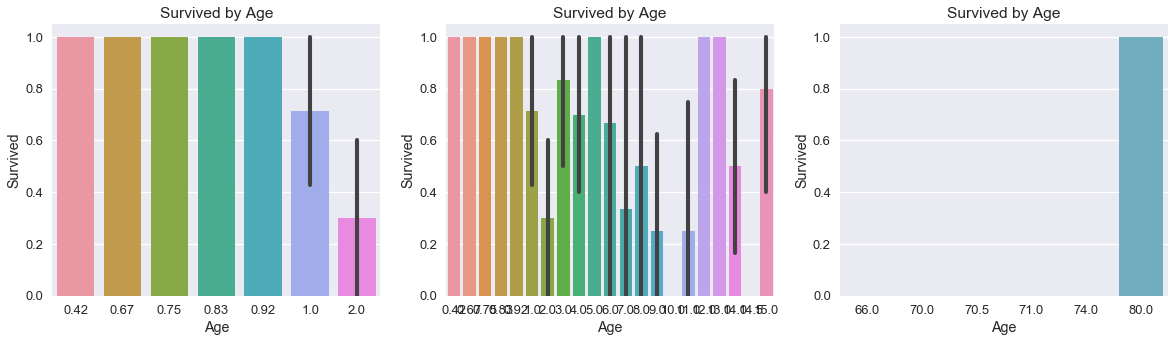

In [224]:
f, (g1, g2,g3) = plt.subplots(1,3, figsize=(20,5))
sns.barplot(x="Age", y="Survived",data=train[train['Age']<=2], ax=g1).set_title("Survived by Age");
sns.barplot(x="Age", y="Survived",data=train[train['Age']<16], ax=g2).set_title("Survived by Age");
sns.barplot(x="Age", y="Survived",data=train[(train['Age']>65)] ,ax=g3).set_title("Survived by Age");


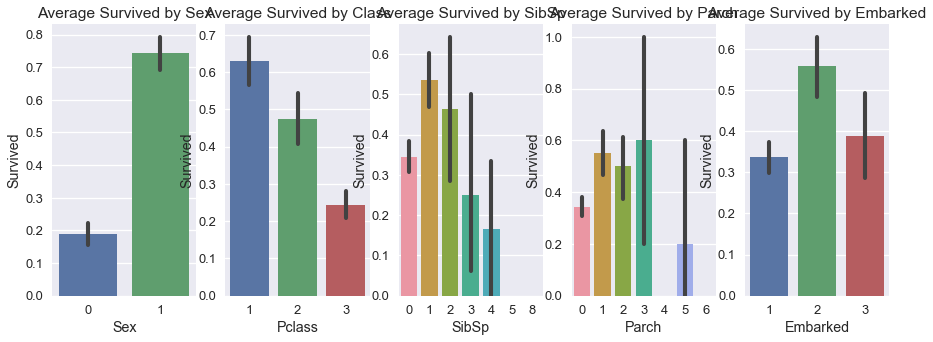

In [225]:
f, ((g1, g2,g3, g4,g5)) = plt.subplots(1,5, figsize=(15,5))
sns.barplot(x="Sex", y="Survived", data=train, ax=g1).set_title("Average Survived by Sex");
sns.barplot(x="Pclass", y="Survived", data=train, ax=g2).set_title("Average Survived by Class");
sns.barplot(x="SibSp", y="Survived", data=train, ax=g3).set_title("Average Survived by SibSp");
sns.barplot(x="Parch", y="Survived", data=train, ax=g4).set_title("Average Survived by Parch");
sns.barplot(x="Embarked", y="Survived", data=train, ax=g5).set_title("Average Survived by Embarked");

Let's sub divice the age into few categories and analyse the survival rates

In [226]:
def getAgeCategory(df):
    age=df['Age']
    if(age<2):
        return 1
    if(age<16):
        return 2
    elif (age>=65):
        return 4
    else: return 3

train['ageCat']= train.apply(getAgeCategory, axis=1)
test['ageCat']= train.apply(getAgeCategory, axis=1)

In [227]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageCat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,-,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,-,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,-,1,3


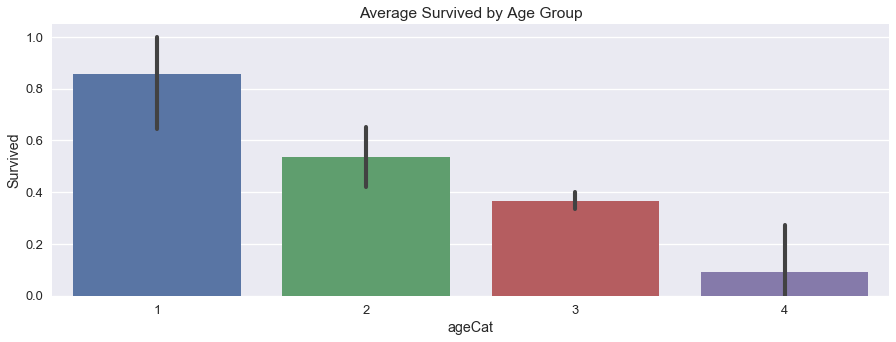

In [228]:
sns.barplot(x="ageCat", y="Survived", data=train).set_title("Average Survived by Age Group");

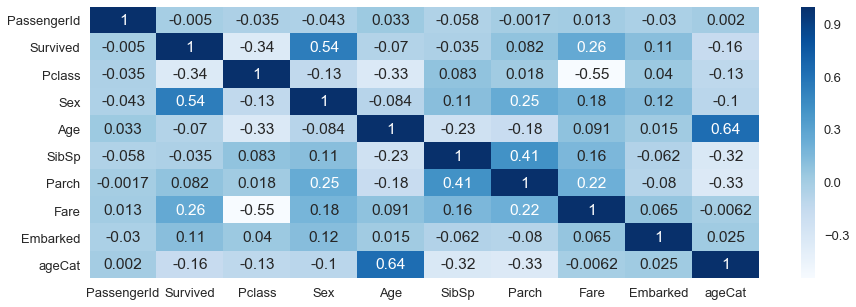

In [229]:
sns.set(rc={'figure.figsize':(15,5)})

sns.set_context("talk", font_scale=1.0)


sns.heatmap(train.corr(), cmap='Blues', annot=True);

# 4. Model
Clustering, Classification, Regression, Dimensionality reduction

## Logistic Regression Classification Model

In [233]:
# Establishing the base dataset
X = train[['Sex','Pclass','Age','Embarked','Fare','SibSp','Parch']]
y = train['Survived'] 

 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict (X_test)

accuracy_score(y_test,predictions)

0.7910447761194029

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Establishing the base dataset
X = train[['Sex','Pclass','ageCat','Fare','Embarked', 'SibSp','Parch']]
y = train['Survived'] 

 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

accuracy_score(y_test,predictions)


0.7947761194029851

In [232]:
X_predict = test[['Sex','Pclass','ageCat','Fare','Embarked', 'SibSp','Parch']]

predictions = logmodel.predict(X_predict)

X_predict = test
X_predict.assign(left_predict = predictions)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageCat,left_predict
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,-,3,3,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,-,1,3,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,-,3,3,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,-,1,3,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,-,1,3,0
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,-,1,3,0
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,-,3,3,1
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,-,1,2,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,-,2,3,1
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,-,1,2,0


### Random Forest Classification Model


In [234]:
from sklearn.ensemble import RandomForestClassifier

In [235]:
# Establishing the base dataset
X = train[['Sex','Pclass','ageCat','Fare','Embarked', 'SibSp','Parch']]
y = train['Survived'] 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

forest = RandomForestClassifier(n_estimators=100,
                             criterion='gini',
                             max_depth=5,
                             min_samples_split=10,
                             min_samples_leaf=5,
                             random_state=0)
forest.fit(X_train,y_train)

predictions = forest.predict(X_test)

accuracy_score(y_test,predictions)


0.8134328358208955